## Exercise 6a - Morley's Boxplots

Create box plots on a single set of axes for all five experiments in the morley data set.

[Wiki](https://en.wikipedia.org/wiki/Box_plot) [G4G](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) [Matplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mor = pd.DataFrame(pd.read_csv('morley.csv'))
# mor

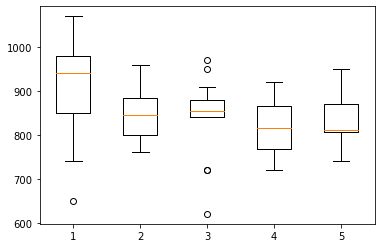

In [3]:
# create datasets for each experiment number. I found the code for filtering DataFrames on the GeeksForGeeks 
# page in the README, and the loop to create variables in the StackOverflow link.
spds = {}

# look through numbers 1 to 5, and create a seperate dictionary item for 
for i in range(1, 6):
    spds[i] = mor[mor['Expt'] == i]['Speed']
    # print(e[i])

# code adapted from Ian's tutorial
plt.boxplot(np.array([spds[1],spds[2],spds[3],spds[4],spds[5]]).T)
plt.show()

## Exercise 6b - Fisher's Iris Boxplots

Create box plots for all of the numerical variables in Fisher's Iris data set.

PL: 1.0 to 6.9 PW: 0.1 to 2.5 SL: 4.3 to 7.9 SW: 2.0 to 4.4


C:\Users\stuar\AppData\Local\Temp\ipykernel_5644\98324372.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['petal length', 'petal width','sepal length', 'sepal width'])


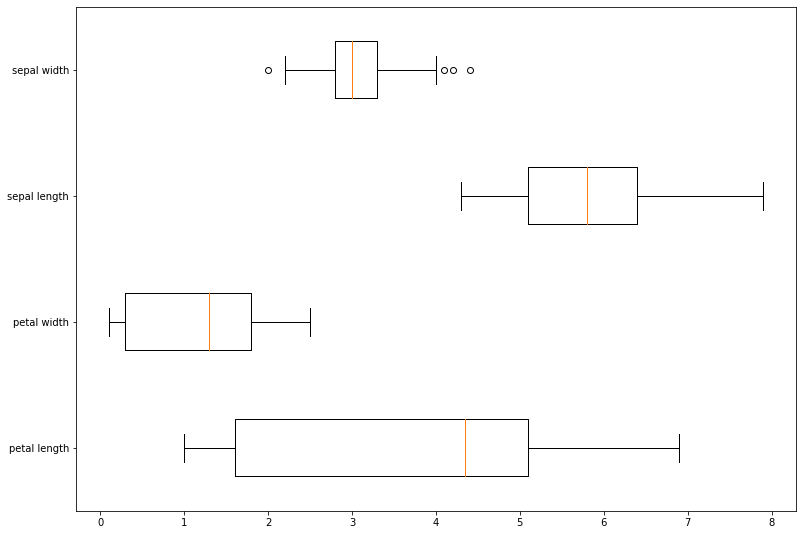

In [4]:
# following the GeeksForGeeks tutorial linked in the README
iris = pd.DataFrame(pd.read_csv('iris.csv'))
# separate each column into a list
pl = iris['petal_length']
pw = iris['petal_width']
sl = iris['sepal_length']
sw = iris['sepal_width']

data = [pl,pw,sl,sw]

# creates a larger display area
fig = plt.figure(figsize=(10, 7))

# a new axis for custom labels
ax = fig.add_axes([0,0,1,1])
ax.set_yticklabels(['petal length', 'petal width','sepal length', 'sepal width'])

# vert parameter turns the plot on its side
ax.boxplot(data, vert=0);
# testing just to make sure the correct label is attached to the correct plot
print(
    "PL:", pl.min(), "to", pl.max(), 
    "PW:", pw.min(), "to", pw.max(), 
    "SL:", sl.min(), "to", sl.max(), 
    "SW:", sw.min(), "to", sw.max())

## Exercise 6c - Proportionality

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

The definitions of direct and inverse proportion are as follows:

    Two quantities are directly proportional to each other when an increase or decrease in one leads to an increase or decrease in the other. While on the other hand, two quantities are said to be in inverse proportion if an increase in one quantity leads to a decrease in the other, and vice-versa. 
([CueMath](https://www.cuemath.com/commercial-math/direct-proportion/), 2022)
    
     There is a direct proportion between two values when one is a multiple of the other... Inverse proportion occurs when one value increases and the other decreases.
([BBC Bitesize](https://www.bbc.co.uk/bitesize/guides/zqd6srd/revision/3), 2022)

Essentially what we are being asked to do here is then reverse the direction of both facets of the plot. The overall plot will now trend from the top-left to the bottom-right corners of the plot, while the individual groups will trend in a direction from lower-left to upper-right.

### Original version

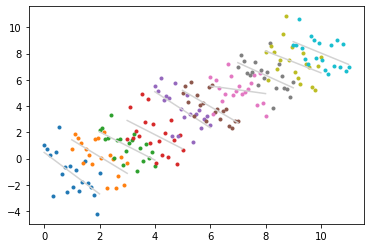

In [12]:
# Create a series of x vectors
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])
# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

### First attempt

In my first attempt below I simply replaced the addition operations with subtractions, and converted the multiplier in the <i>ys</i> variable to a positive number. The pattern matches what was required: the overall plot now runs from top-left to bottom-right, while the sub-groups trend in the opposite direction. Of course, this seems like too simple a solution, it in fact isn't proportional at all, because the horizontal and vertical axes aren't really matching. In my plot the x-axis now runs from -2 to 8, while the y-axis runs from 2 to -12.

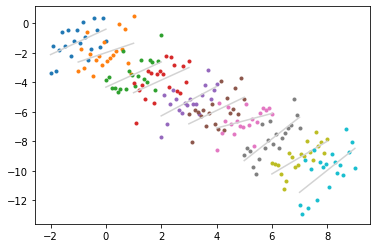

In [61]:
# Same as original, creates 10 sets of 20 points, the lower boundary of each set being the value of i
xs = np.array([np.linspace(i, i - 2.0, 20) for i in range(10)])
# changed from negative to positive value at start of list comprehension, then changed the addition to subtraction
ys = np.array([1.0 * xs[i] - 2 * i for i in range(len(xs))])
# all code beyond this point doesn't need to change, x and y reduce xs and ys to one-dimensional ranges
x = xs.flatten()
y = ys.flatten()

ys = ys + np.random.normal(0.0, 1.0, ys.shape)

for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')
    m, c = np.polyfit(xs[i], ys[i], 1)
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    ybestfit = m * xbestfit + c
    plt.plot(xbestfit, ybestfit, color='lightgrey');

### Second Attempt

It seemed that the to change the ranges, we'll have to just amend the <i>xs</i> and <i>ys</i> variables, as the for loop is plotting the resulting range and their lines of best-fit. Further, the <i>xs</i> items are simply plotting a list of points in a range between <i>i</i> and <i>i</i>-2 in a range, so they make no difference to whether the range direction the overall range trends in, but instead on how close the points in each sub-group are clustered together, and whereabouts the lower end of this range is. 

The key then must be in the <i>ys</i> variable, so I added the length of <i>xs</i> back to it to get to a similar starting point.

[10.10526316  9.10526316  8.10526316  7.10526316  6.10526316  5.10526316
  4.10526316  3.10526316  2.10526316  1.10526316]


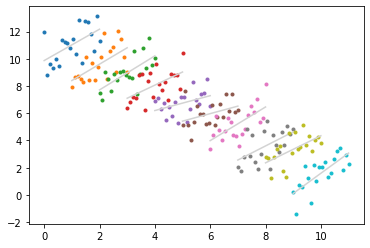

In [104]:
# Same as original, creates 10 sets of 20 points, the lower boundary of each set being the value of i
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])
# Add the length of xs to establish a higher upper bound for each plot
ys = np.array([len(xs) + 1.0 * xs[i] - 2 * i for i in range(len(xs))])
# print mean of each range to demonstrate steadily decreasing value for each loop
print(ys[:,1])
# all code beyond this point doesn't need to change, x and y reduce xs and ys to one-dimensional ranges
x = xs.flatten()
y = ys.flatten()

ys = ys + np.random.normal(0.0, 1.0, ys.shape)

for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')
    m, c = np.polyfit(xs[i], ys[i], 1)
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    ybestfit = m * xbestfit + c
    plt.plot(xbestfit, ybestfit, color='lightgrey');